Training model with batch size 10...


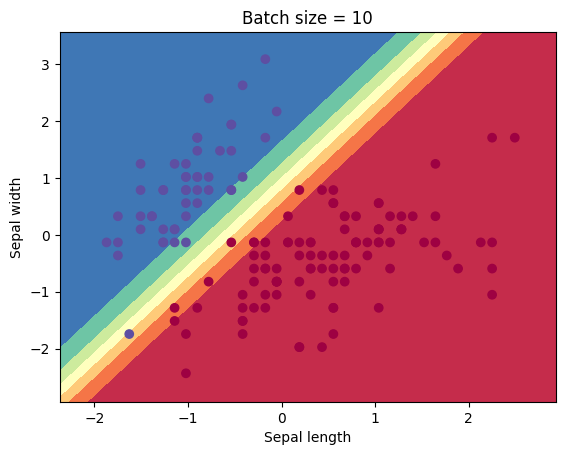

Accuracy on test set: 0.99

Training model with batch size 50...


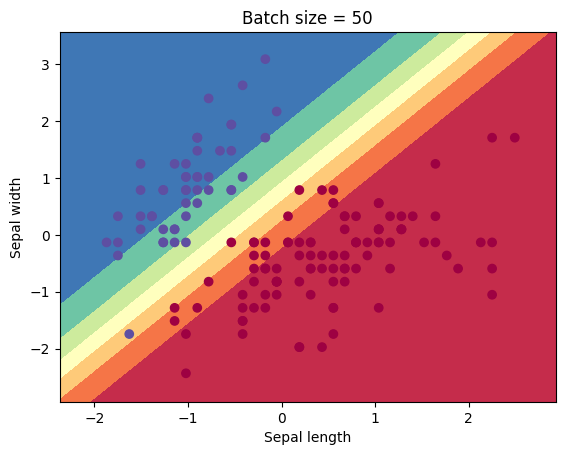

Accuracy on test set: 0.99

Training model with batch size 100...


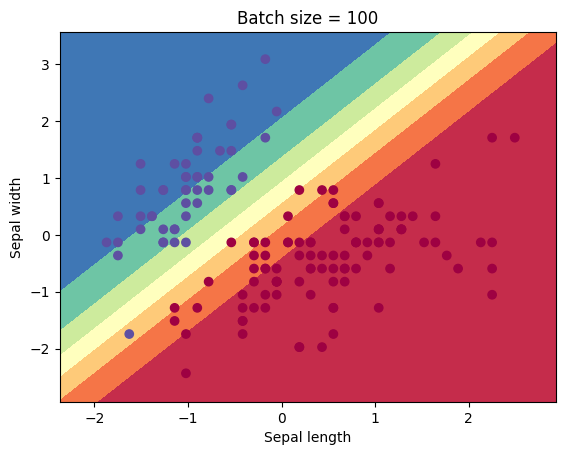

Accuracy on test set: 0.99



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# load iris dataset
iris = load_iris()
X = iris.data[:, :2]  # we only take the first two features
y = iris.target

# preprocess data
X = (X - X.mean(axis=0)) / X.std(axis=0)
y = np.where(y == 0, 1, 0)  # convert to binary classification problem

# define logistic regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def predict(X, w, b):
    return sigmoid(X.dot(w) + b)

def loss(y, y_hat):
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def gradient(X, y, y_hat):
    dw = X.T.dot(y_hat - y) / X.shape[0]
    db = np.mean(y_hat - y)
    return dw, db

def train(X, y, learning_rate, epochs, batch_size):
    w = np.zeros(X.shape[1])
    b = 0
    losses = []
    for epoch in range(epochs):
        # shuffle data
        idx = np.random.permutation(X.shape[0])
        X = X[idx]
        y = y[idx]
        # loop over batches
        for i in range(0, X.shape[0], batch_size):
            X_batch = X[i:i+batch_size]
            y_batch = y[i:i+batch_size]
            y_hat = predict(X_batch, w, b)
            dw, db = gradient(X_batch, y_batch, y_hat)
            w -= learning_rate * dw
            b -= learning_rate * db
            losses.append(loss(y_batch, y_hat))
    return w, b, losses

# train model with different batch sizes
batch_sizes = [10, 50, 100]
learning_rate = 0.01
epochs = 1000

for batch_size in batch_sizes:
    print(f'Training model with batch size {batch_size}...')
    w, b, losses = train(X, y, learning_rate, epochs, batch_size)
    
    # plot decision boundary and data points
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = predict(np.c_[xx.ravel(), yy.ravel()], w, b)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.title(f'Batch size = {batch_size}')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()
    
    # evaluate model on test set
    y_pred = predict(X, w, b) > 0.5
    accuracy = np.mean(y == y_pred)
    print(f'Accuracy on test set: {accuracy:.2f}\n')
